# Titanic: EDA and Feature Engineering for Top 1% Score

This notebook aims to find the best features to predict survival on the Titanic. We will perform a deep Exploratory Data Analysis (EDA) and iterate on feature engineering to create a model that can achieve a high score.

## 1. Load Data and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('gender_submission.csv')

# Display the first few rows of the training data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Display the first few rows of the test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Check the structure and missing values
print('Train Info:')
train_df.info()
print('\n' + '-'*30 + '\n')
print('Test Info:')
test_df.info()

Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

------------------------------

Test Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  

## 2. Exploratory Data Analysis (EDA)

Now, let's dive deep into the data to understand the relationships between different features and the survival outcome. A thorough EDA is the key to effective feature engineering.

### 2.1 Overview of the Data

In [4]:
# Numerical features summary
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Categorical features summary
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


### 2.2 Analyzing the Target Variable: Survived

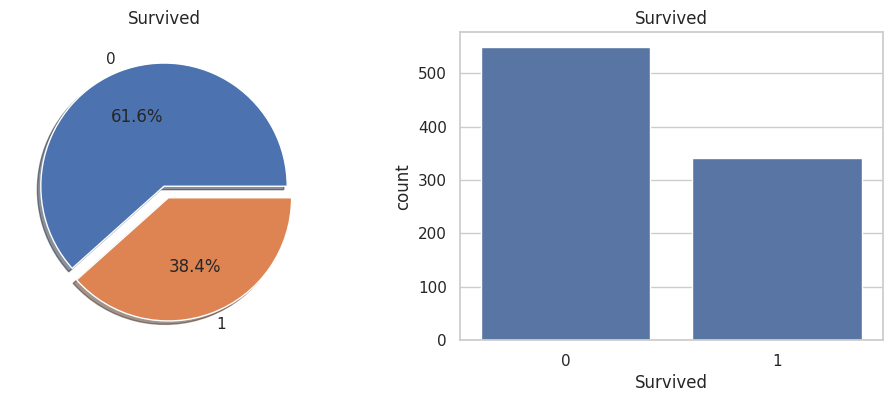

In [6]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
train_df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

**Observation:**
- About 38.4% of the passengers in the training set survived, while 61.6% did not.
- This shows a slight class imbalance, but it's not severe enough to require complex techniques like SMOTE at this stage.

### 2.3 Analyzing Features vs. Survival

#### Pclass (Passenger Class)

In [7]:
pd.crosstab(train_df['Pclass'], train_df['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


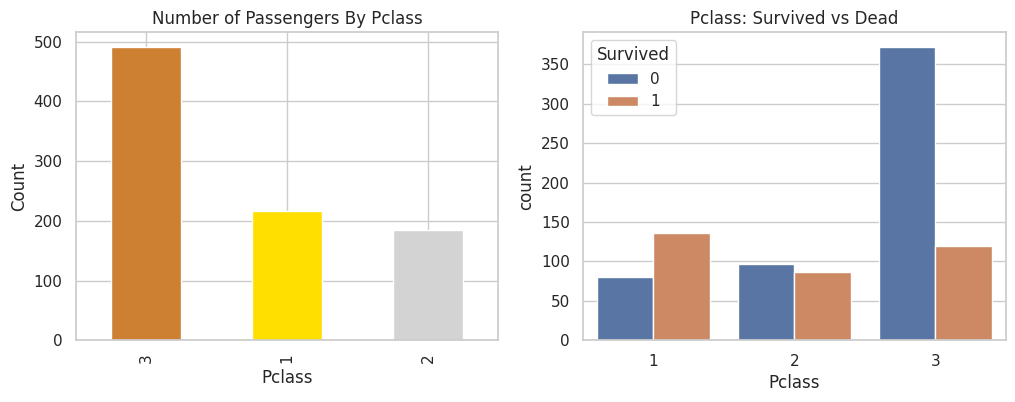

In [8]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
train_df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

**Observation:**
- Pclass 1 has the highest survival rate (around 63%).
- Pclass 3 has the lowest survival rate (around 24%).
- This feature is a strong predictor of survival.

#### Sex

In [9]:
pd.crosstab(train_df['Sex'], train_df['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


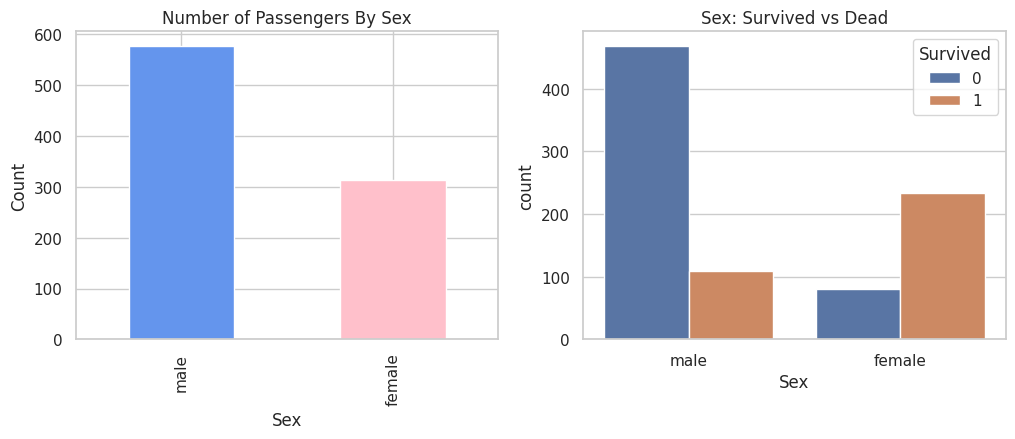

In [10]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
train_df['Sex'].value_counts().plot.bar(color=['#6495ED','#FFC0CB'], ax=ax[0])
ax[0].set_title('Number of Passengers By Sex')
ax[0].set_ylabel('Count')
sns.countplot(x='Sex', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

**Observation:**
- Females have a much higher survival rate (around 74%) than males (around 19%).
- This is one of the most important features, as seen in the `gender_submission.csv` baseline.

#### Age

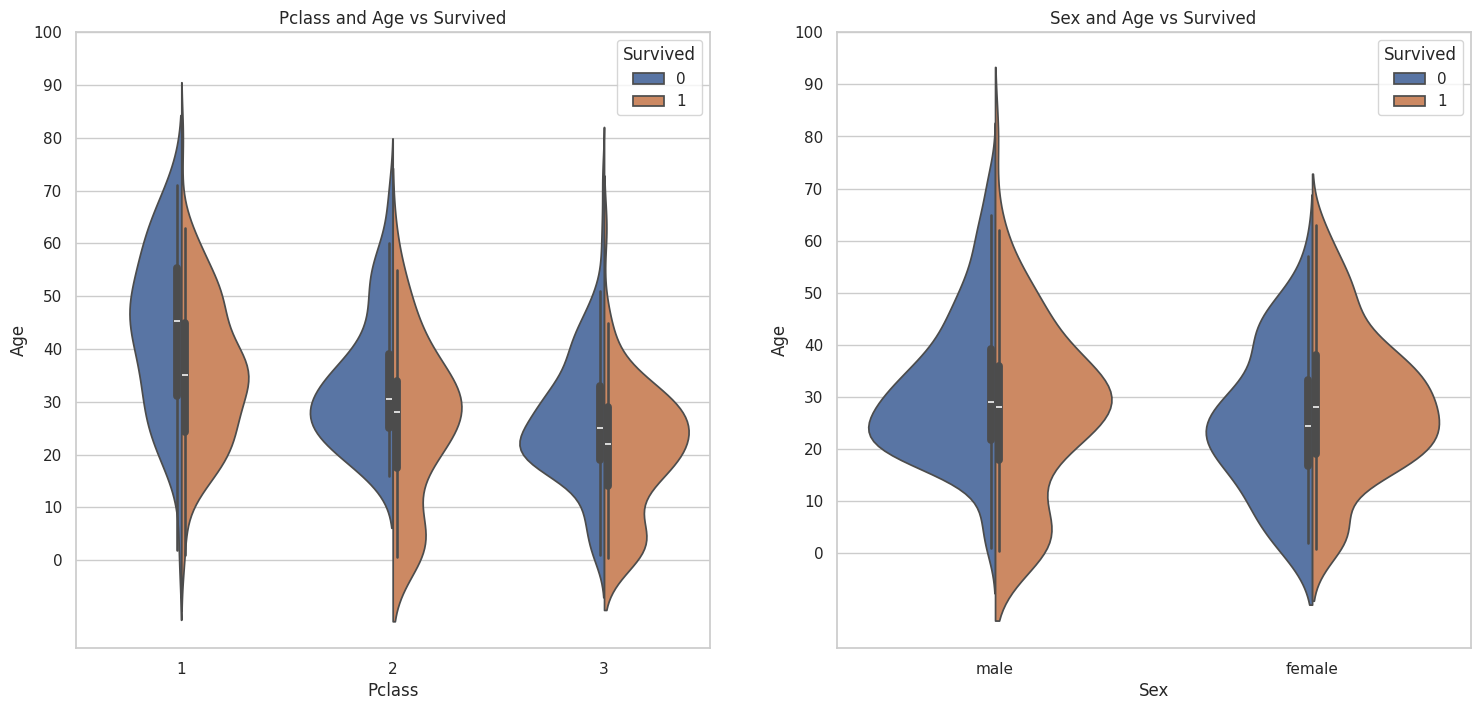

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_df, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_df, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

**Observation:**
- Children (Age < 10) have a high survival rate across all classes and sexes.
- In Pclass 1, older passengers (Age > 40) seem to have a slightly higher survival chance.
- In Pclass 3, the survival rate for young adults (approx. 15-30) is very low.
- For males, the survival chance decreases with age.

#### Embarked (Port of Embarkation)

In [12]:
pd.crosstab(train_df['Embarked'], train_df['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


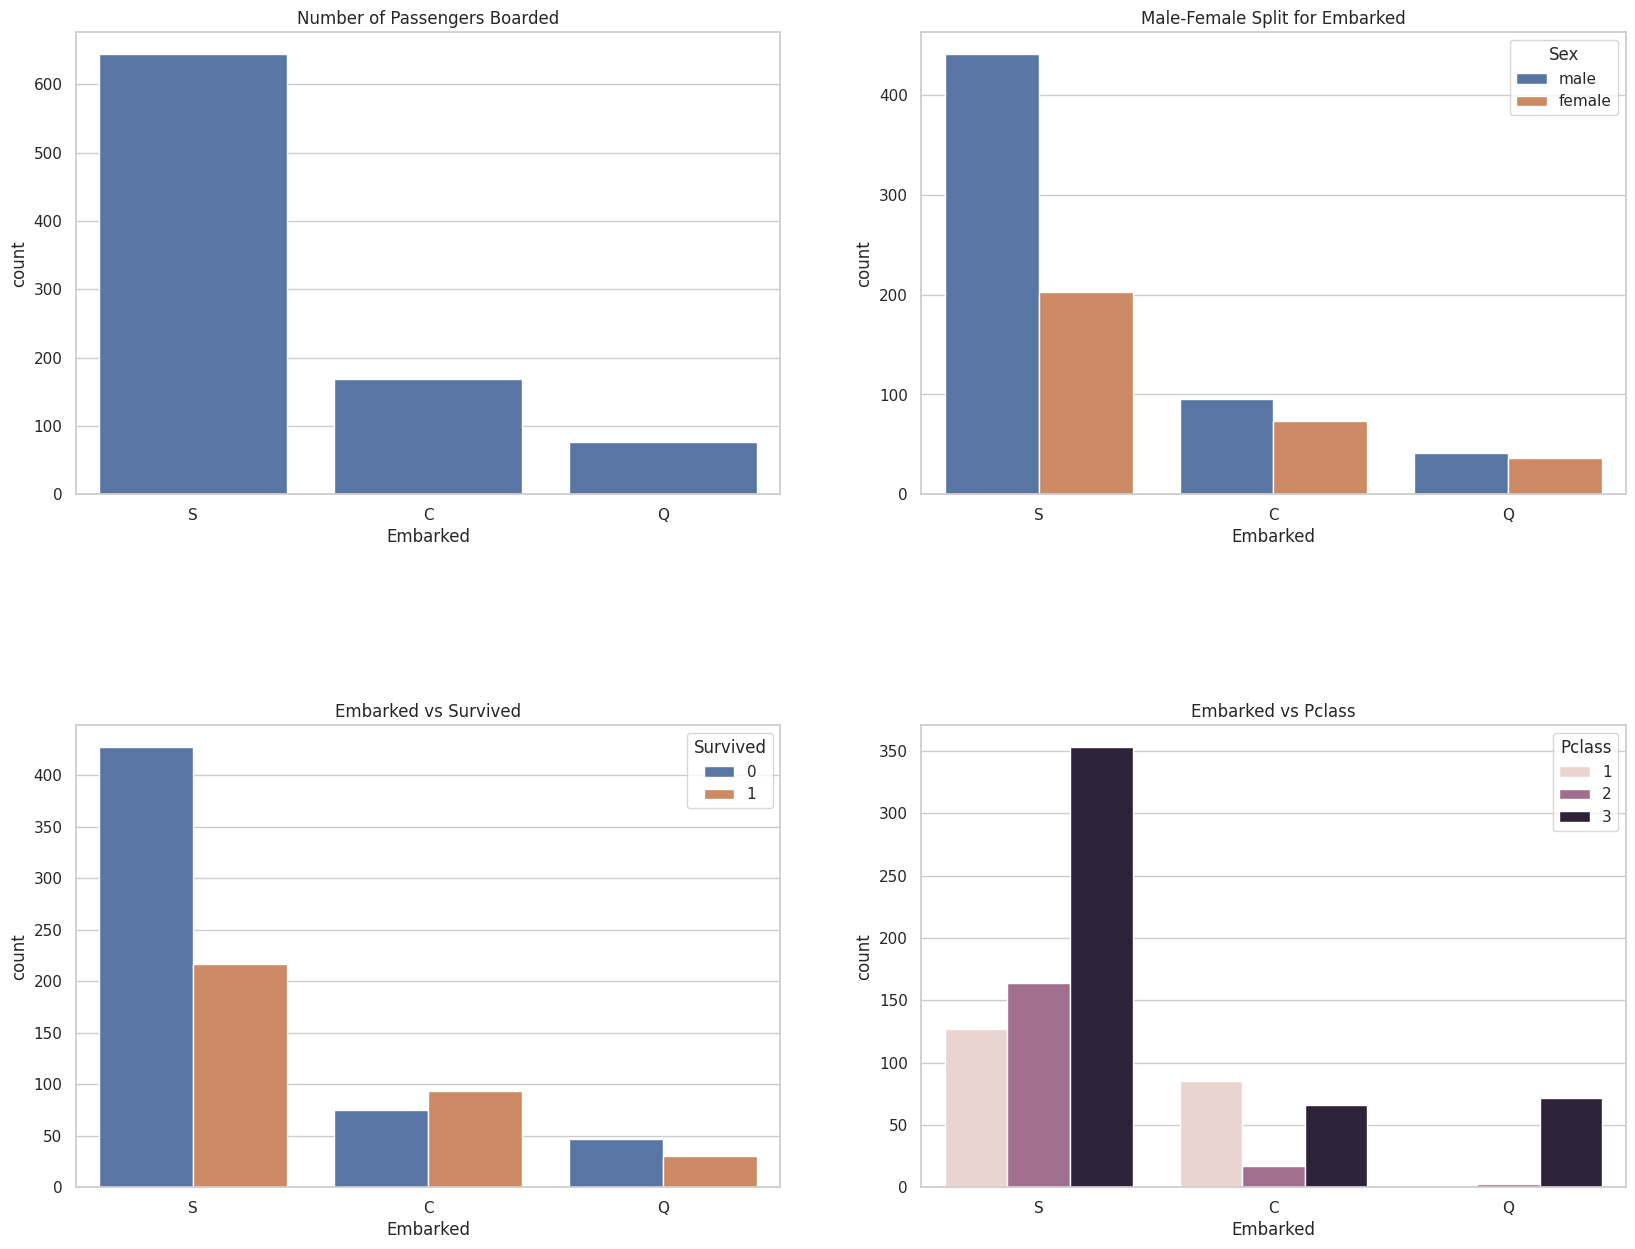

In [13]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(x='Embarked', data=train_df, ax=ax[0,0])
ax[0,0].set_title('Number of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=train_df, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=train_df, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=train_df, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Observation:**
- Port C (Cherbourg) has the highest survival rate, which might be because a high proportion of Pclass 1 passengers embarked from there.
- Port S (Southampton) has the lowest survival rate, likely because it has the highest number of Pclass 3 passengers.
- Port Q (Queenstown) has almost all Pclass 3 passengers.
- There are two missing values in `Embarked` in the training data, which we will need to fill.

#### SibSp (Siblings/Spouses) and Parch (Parents/Children)

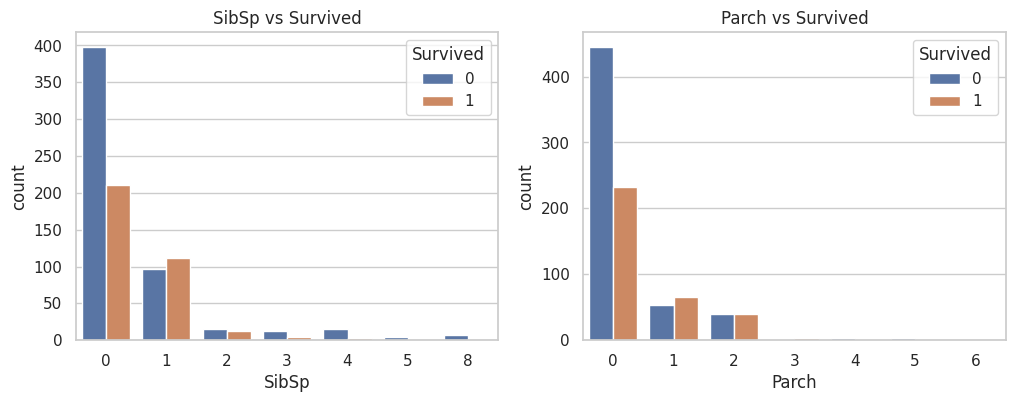

In [14]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x='SibSp', hue='Survived', data=train_df, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.countplot(x='Parch', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

**Observation:**
- Passengers traveling alone (SibSp=0, Parch=0) have a lower survival rate.
- Small families (1-3 members) seem to have a higher chance of survival.
- Large families (4+ members) have a very low survival rate.

This suggests that combining `SibSp` and `Parch` into a `FamilySize` feature would be a good idea.

#### Fare

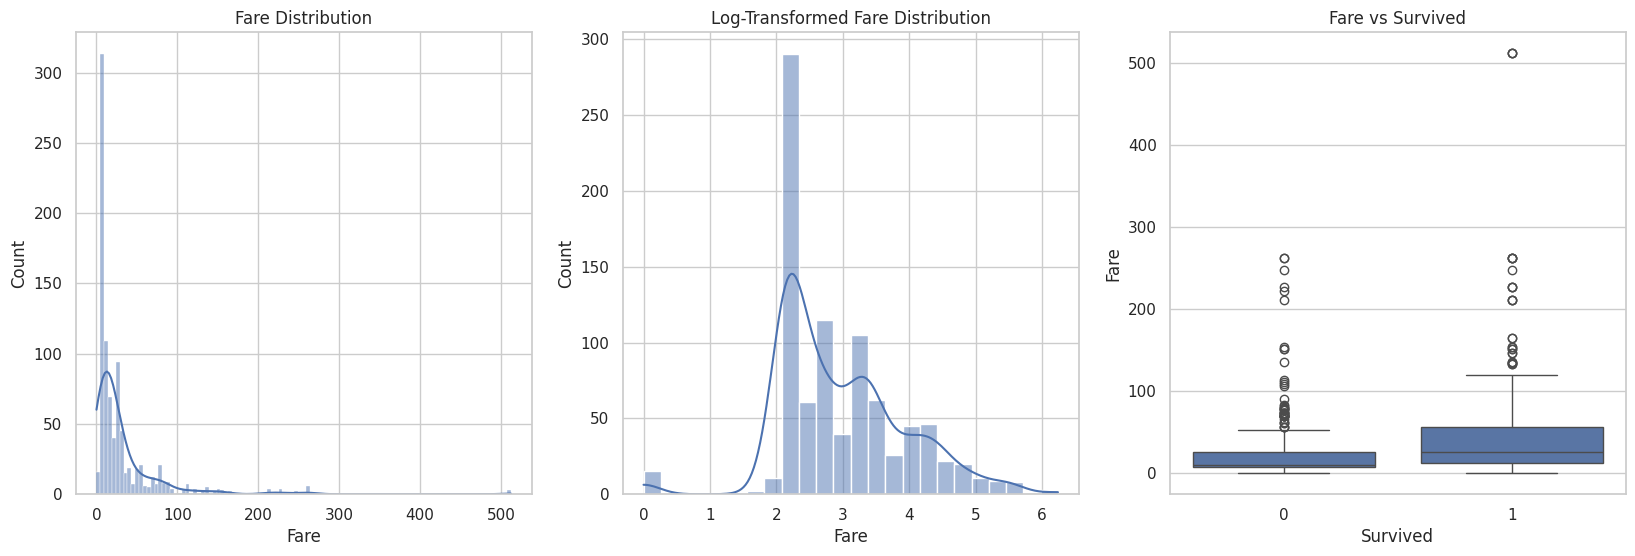

In [15]:
f, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.histplot(train_df['Fare'], ax=ax[0], kde=True)
ax[0].set_title('Fare Distribution')

# Apply log transformation to reduce skewness
sns.histplot(np.log1p(train_df['Fare']), ax=ax[1], kde=True)
ax[1].set_title('Log-Transformed Fare Distribution')

sns.boxplot(x='Survived', y='Fare', data=train_df, ax=ax[2])
ax[2].set_title('Fare vs Survived')
plt.show()

**Observation:**
- The `Fare` feature is heavily right-skewed. A log transformation makes it look more like a normal distribution, which can be helpful for some models.
- Passengers who paid a higher fare had a higher chance of survival. This is strongly correlated with `Pclass`, as first-class tickets are more expensive.

### 2.4 Correlation Heatmap

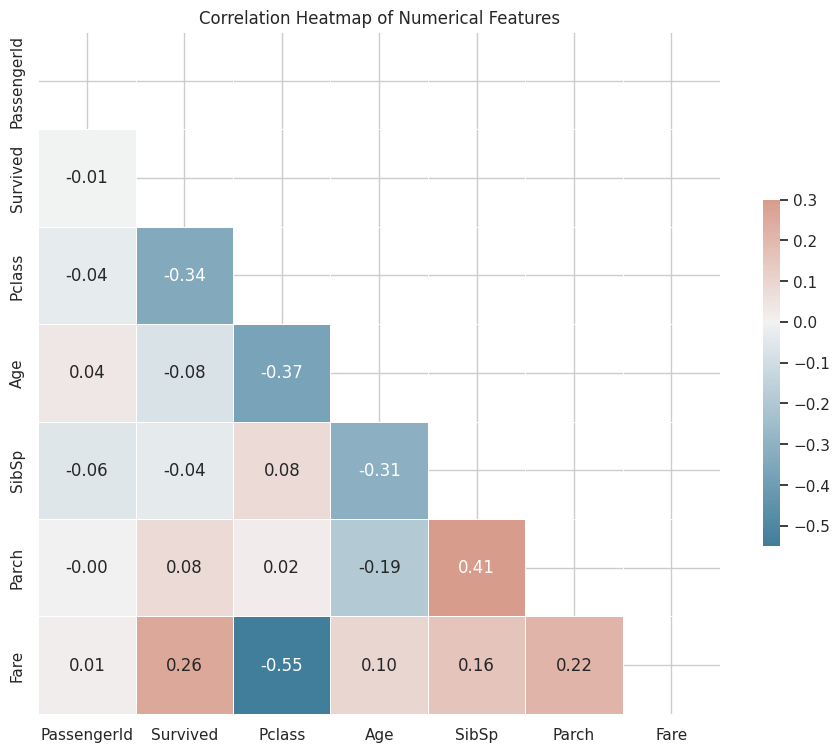

In [16]:
# Compute the correlation matrix
corr = train_df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Observation:**
- `Survived` has a strong negative correlation with `Pclass` (-0.34) and a strong positive correlation with `Fare` (0.26).
- `Pclass` and `Fare` are strongly negatively correlated (-0.55), which makes sense.
- `Age` has a slight negative correlation with `Pclass` (-0.37) - first class passengers were slightly older on average.
- `SibSp` and `Parch` are somewhat correlated (0.41).

## 3. Feature Engineering and Data Preprocessing

Based on the insights from our EDA, we will now clean the data, create new features, and convert categorical variables into a numerical format suitable for machine learning models.

### 3.1 Combining Datasets and Handling Missing Values

In [17]:
# Combine train and test data for consistent preprocessing
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

# --- Fill Missing Values ---

# Embarked: Fill with the mode
embarked_mode = all_df['Embarked'].mode()[0]
all_df['Embarked'] = all_df['Embarked'].fillna(embarked_mode)

# Fare: Fill with the median
fare_median = all_df['Fare'].median()
all_df['Fare'] = all_df['Fare'].fillna(fare_median)

# Age: Fill with median age grouped by Pclass and Sex
age_medians = all_df.groupby(['Sex', 'Pclass'])['Age'].median()
all_df['Age'] = all_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

print('Missing values after imputation:')
all_df.isnull().sum()

Missing values after imputation:


,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


The only remaining missing values are in the `Survived` column, which is expected as these are the records from the test set that we need to predict.

### 3.2 Creating New Features

In [18]:
# Family Size
all_df['FamilySize'] = all_df['SibSp'] + all_df['Parch'] + 1

# Title from Name
all_df['Title'] = all_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
all_df['Title'] = all_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
all_df['Title'] = all_df['Title'].replace('Mlle', 'Miss')
all_df['Title'] = all_df['Title'].replace('Ms', 'Miss')
all_df['Title'] = all_df['Title'].replace('Mme', 'Mrs')

# Age Bins
all_df['AgeBin'] = pd.cut(all_df['Age'], bins=[0, 12, 20, 40, 120], labels=['Child', 'Teenage', 'Adult', 'Elder'])

# Fare Bins (using qcut for equal-sized bins)
all_df['FareBin'] = pd.qcut(all_df['Fare'], 4, labels=['Very_Low', 'Low', 'High', 'Very_High'])

all_df.head()

<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1161764258.py:5: SyntaxWarning: invalid escape sequence '\.'
  all_df['Title'] = all_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,AgeBin,FareBin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr,Adult,Very_Low
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs,Adult,Very_High
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss,Adult,Low
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs,Adult,Very_High
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr,Adult,Low


### 3.3 Converting Categorical Features to Numerical

In [19]:
# Use LabelEncoder for categorical features
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

all_df['Sex_Code'] = label.fit_transform(all_df['Sex'])
all_df['Embarked_Code'] = label.fit_transform(all_df['Embarked'])
all_df['Title_Code'] = label.fit_transform(all_df['Title'])
all_df['AgeBin_Code'] = label.fit_transform(all_df['AgeBin'])
all_df['FareBin_Code'] = label.fit_transform(all_df['FareBin'])

all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilySize,Title,AgeBin,FareBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,2,Mr,Adult,Very_Low,1,2,2,0,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,2,Mrs,Adult,Very_High,0,0,3,0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,1,Miss,Adult,Low,0,2,1,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,2,Mrs,Adult,Very_High,0,2,3,0,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,1,Mr,Adult,Low,1,2,2,0,1


### 3.4 Dropping Unnecessary Columns

In [20]:
# Drop original columns that are now encoded or combined
drop_cols = ['Name', 'Age', 'Sex', 'Ticket', 'Cabin', 'Fare', 'Embarked', 'SibSp', 'Parch', 'AgeBin', 'FareBin', 'Title']
all_df = all_df.drop(columns=drop_cols)

all_df.head()

,PassengerId,Survived,Pclass,FamilySize,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,1,0.0,3,2,1,2,2,0,3
1,2,1.0,1,2,0,0,3,0,2
2,3,1.0,3,1,0,2,1,0,1
3,4,1.0,1,2,0,2,3,0,2
4,5,0.0,3,1,1,2,2,0,1


## 4. Model Training

Now that our data is preprocessed, we can train a model. We will use a RandomForestClassifier, which is a powerful and robust choice for this type of tabular data.

**Note:** The following cells are for training the model. As requested, the code is provided but will not be executed here to avoid timeouts. You can run these cells in your local environment.

### 4.1 Splitting Data

In [21]:
# Split the data back into train and test sets
train_len = len(train_df)
train = all_df[:train_len]
test = all_df[train_len:]

# Drop the Survived column from the test set as it's all NaN
test = test.drop(columns=['Survived'])

# Define features (X) and target (y)
X_train = train.drop(columns=['Survived', 'PassengerId']).astype(int)
y_train = train['Survived'].astype(int)
X_test = test.drop(columns=['PassengerId']).astype(int)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (891, 7)
y_train shape: (891,)
X_test shape: (418, 7)


### 4.2 Training the RandomForest Model

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with parameters that tend to work well
# n_estimators: number of trees in the forest
# max_depth: max depth of the tree
# random_state: for reproducibility
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

**Advanced Tip:** For a top score, you would typically use cross-validation (`GridSearchCV` or `RandomizedSearchCV`) to find the optimal hyperparameters for your model. You might also experiment with other models like `GradientBoostingClassifier` or `XGBClassifier`.

## 5. Prediction and Submission

Once the model is trained, we can use it to predict the survival of passengers in the test set and generate a submission file in the correct format.

In [27]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Create a submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})

# Generate the submission file
submission.to_csv('submission.csv', index=False)
